# Topics Covered in the previous sessions 

What is Machine Learning ?

Supervised Learning 

Unsupervised Learning 



# Model and Cost Function 
Model representation 

Model Representation
First, the goal of most machine learning algorithms is to construct a model: a hypothesis that can be used to estimate Y based on X. The hypothesis, or model, maps inputs to outputs.


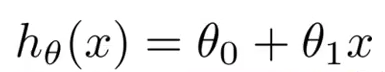



theta values are the parameters

The goal of creating a model is to choose parameters, or theta values, so that h(x) is close to y for the training data



Cost Function (mean difference squared)
https://medium.com/@lachlanmiller_52885/machine-learning-week-1-cost-function-gradient-descent-and-univariate-linear-regression-8f5fe69815fd 

We need a function that will minimize the parameters over our dataset. One common function that is often used is mean squared error, which measure the difference between the estimator (the dataset) and the estimated value (the prediction).









Share them how the GD changing

https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/



# Parameter Learning 

Gradient Descent 

# Model Evaluation
- Training and Validation
- Model Evaluation Metrics - Accuracy, RMSE, ROC, AUC, Confusion Matrix, Precision, Recall, F1 Score


# Getting Started 

Predicting Boston Housing Prices

1) Install 
This project requires Python 3 and the following Python libraries installed:

NumPy
matplotlib
scikit-learn

You will also need to have software installed to run and execute an iPython Notebook
Install Anaconda, a pre-packaged Python distribution that contains all of the necessary libraries and software for this project.

2) Code 
Some code has already been implemented to get you started, you will need to implement additional functionality when requested to successfully complete the exercise


3) Run 
Press Shift + Enter to execute the code


4) Data 
The dataset used in this project is included with the scikit-learn library (sklearn.datasets.load_boston). You do not have to download it separately.


In [ ]:
These are some of the libraries required to start the Python program. 

In [1]:
# Importing the libraries 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

# special matplotlib argument for improved plots

from matplotlib import rcParams

# Exploratory Data Analysis

In [2]:
# Importing the dataset 
# sklearn http://scikit-learn.org/stable/ 

from sklearn.datasets import load_boston

boston = load_boston()

# to see the shape of dataset
print(boston.data.shape)

(506, 13)


In [3]:
# Now let’s convert it into pandas https://pandas.pydata.org/ 

bos = pd.DataFrame(boston.data)
print(bos.head())


        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [4]:
# convert the index to the column names

bos.columns = boston.feature_names
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [ ]:
# Nomenclature 
CRIM per capita crime rate by town
ZN proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS proportion of non-retail business acres per town
CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX nitric oxides concentration (parts per 10 million)
RM average number of rooms per dwelling
AGE proportion of owner-occupied units built prior to 1940
DIS weighted distances to five Boston employment centres
RAD index of accessibility to radial highways
TAX full-value property-tax rate per $10,000
PTRATIO pupil-teacher ratio by town
B 1000(Bk - 0.63)^2 where Bk is the proportion of bl by town
LSTAT % lower status of the population

 So let’s check the shape of the boston.target

In [5]:
print(boston.target.shape)

(506,)


In [8]:
 #Let’s add the price to the DataFrame.

bos['PRICE'] = boston.target
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [6]:
# Basic Statistics for the given dataset 

print(bos.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [15]:
# Optional way to estimate Statistics 
# TODO: Minimum price of the data
minimum_price = np.amin(bos['CRIM'])

# TODO: Maximum price of the data
maximum_price = np.amax(bos['CRIM'])

# TODO: Mean price of the data
mean_price = np.mean(bos['CRIM'])

# TODO: Median price of the data
median_price = np.median(bos['CRIM'])

# TODO: Standard deviation of prices of the data
std_price = np.std(bos['CRIM'])



# Split train-test dataset
split the dataset into two: target value and predictor values. Let’s call the target value Y and predictor values X

In [10]:
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [14]:

from sklearn.cross_validation import train_test_split

#------------------try with random state =off
#Pseudo-random number generator state used for random sampling

X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Linear Regression

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

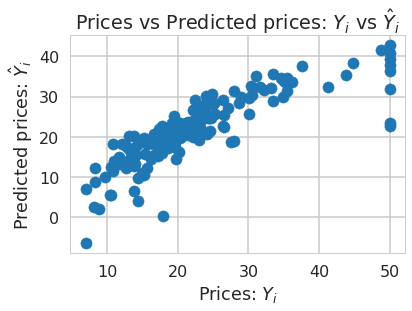

In [21]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

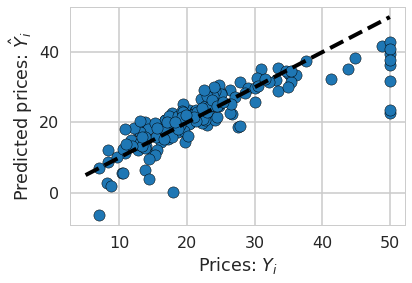

In [24]:
fig, ax = plt.subplots()
ax.scatter(Y_test, Y_pred, edgecolors=(0, 0, 0))
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Prices: $Y_i$')
ax.set_ylabel('Predicted prices: $\hat{Y}_i$')
plt.show()

# Ideally, the scatter plot should create a linear line. Since the model does not fit 100%, the scatter plot is not creating a linear line

# To check the level of error of a model, we can Mean Squared Error. It is one of the procedure to measures the average of the squares of error

In [29]:


np.sum((Y_pred - Y_test)**2)/Y_test.shape[0]

28.541367275619013

In [17]:
#or you can import the Sklearn mse 
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

28.5413672756


In [ ]:
That means that the model isn’t a really great linear model. But, as a start, it is a good way to go. 

Gradient Descent and the model change 

In [ ]:
#Exercise 
1) Please check the RMSE by changing the split of train test dataset (build a function) 


Reference and further reading 
https://www.youtube.com/watch?v=GCvWD9zIF-s 
https://www.youtube.com/watch?v=LN0PLnDpGN4 


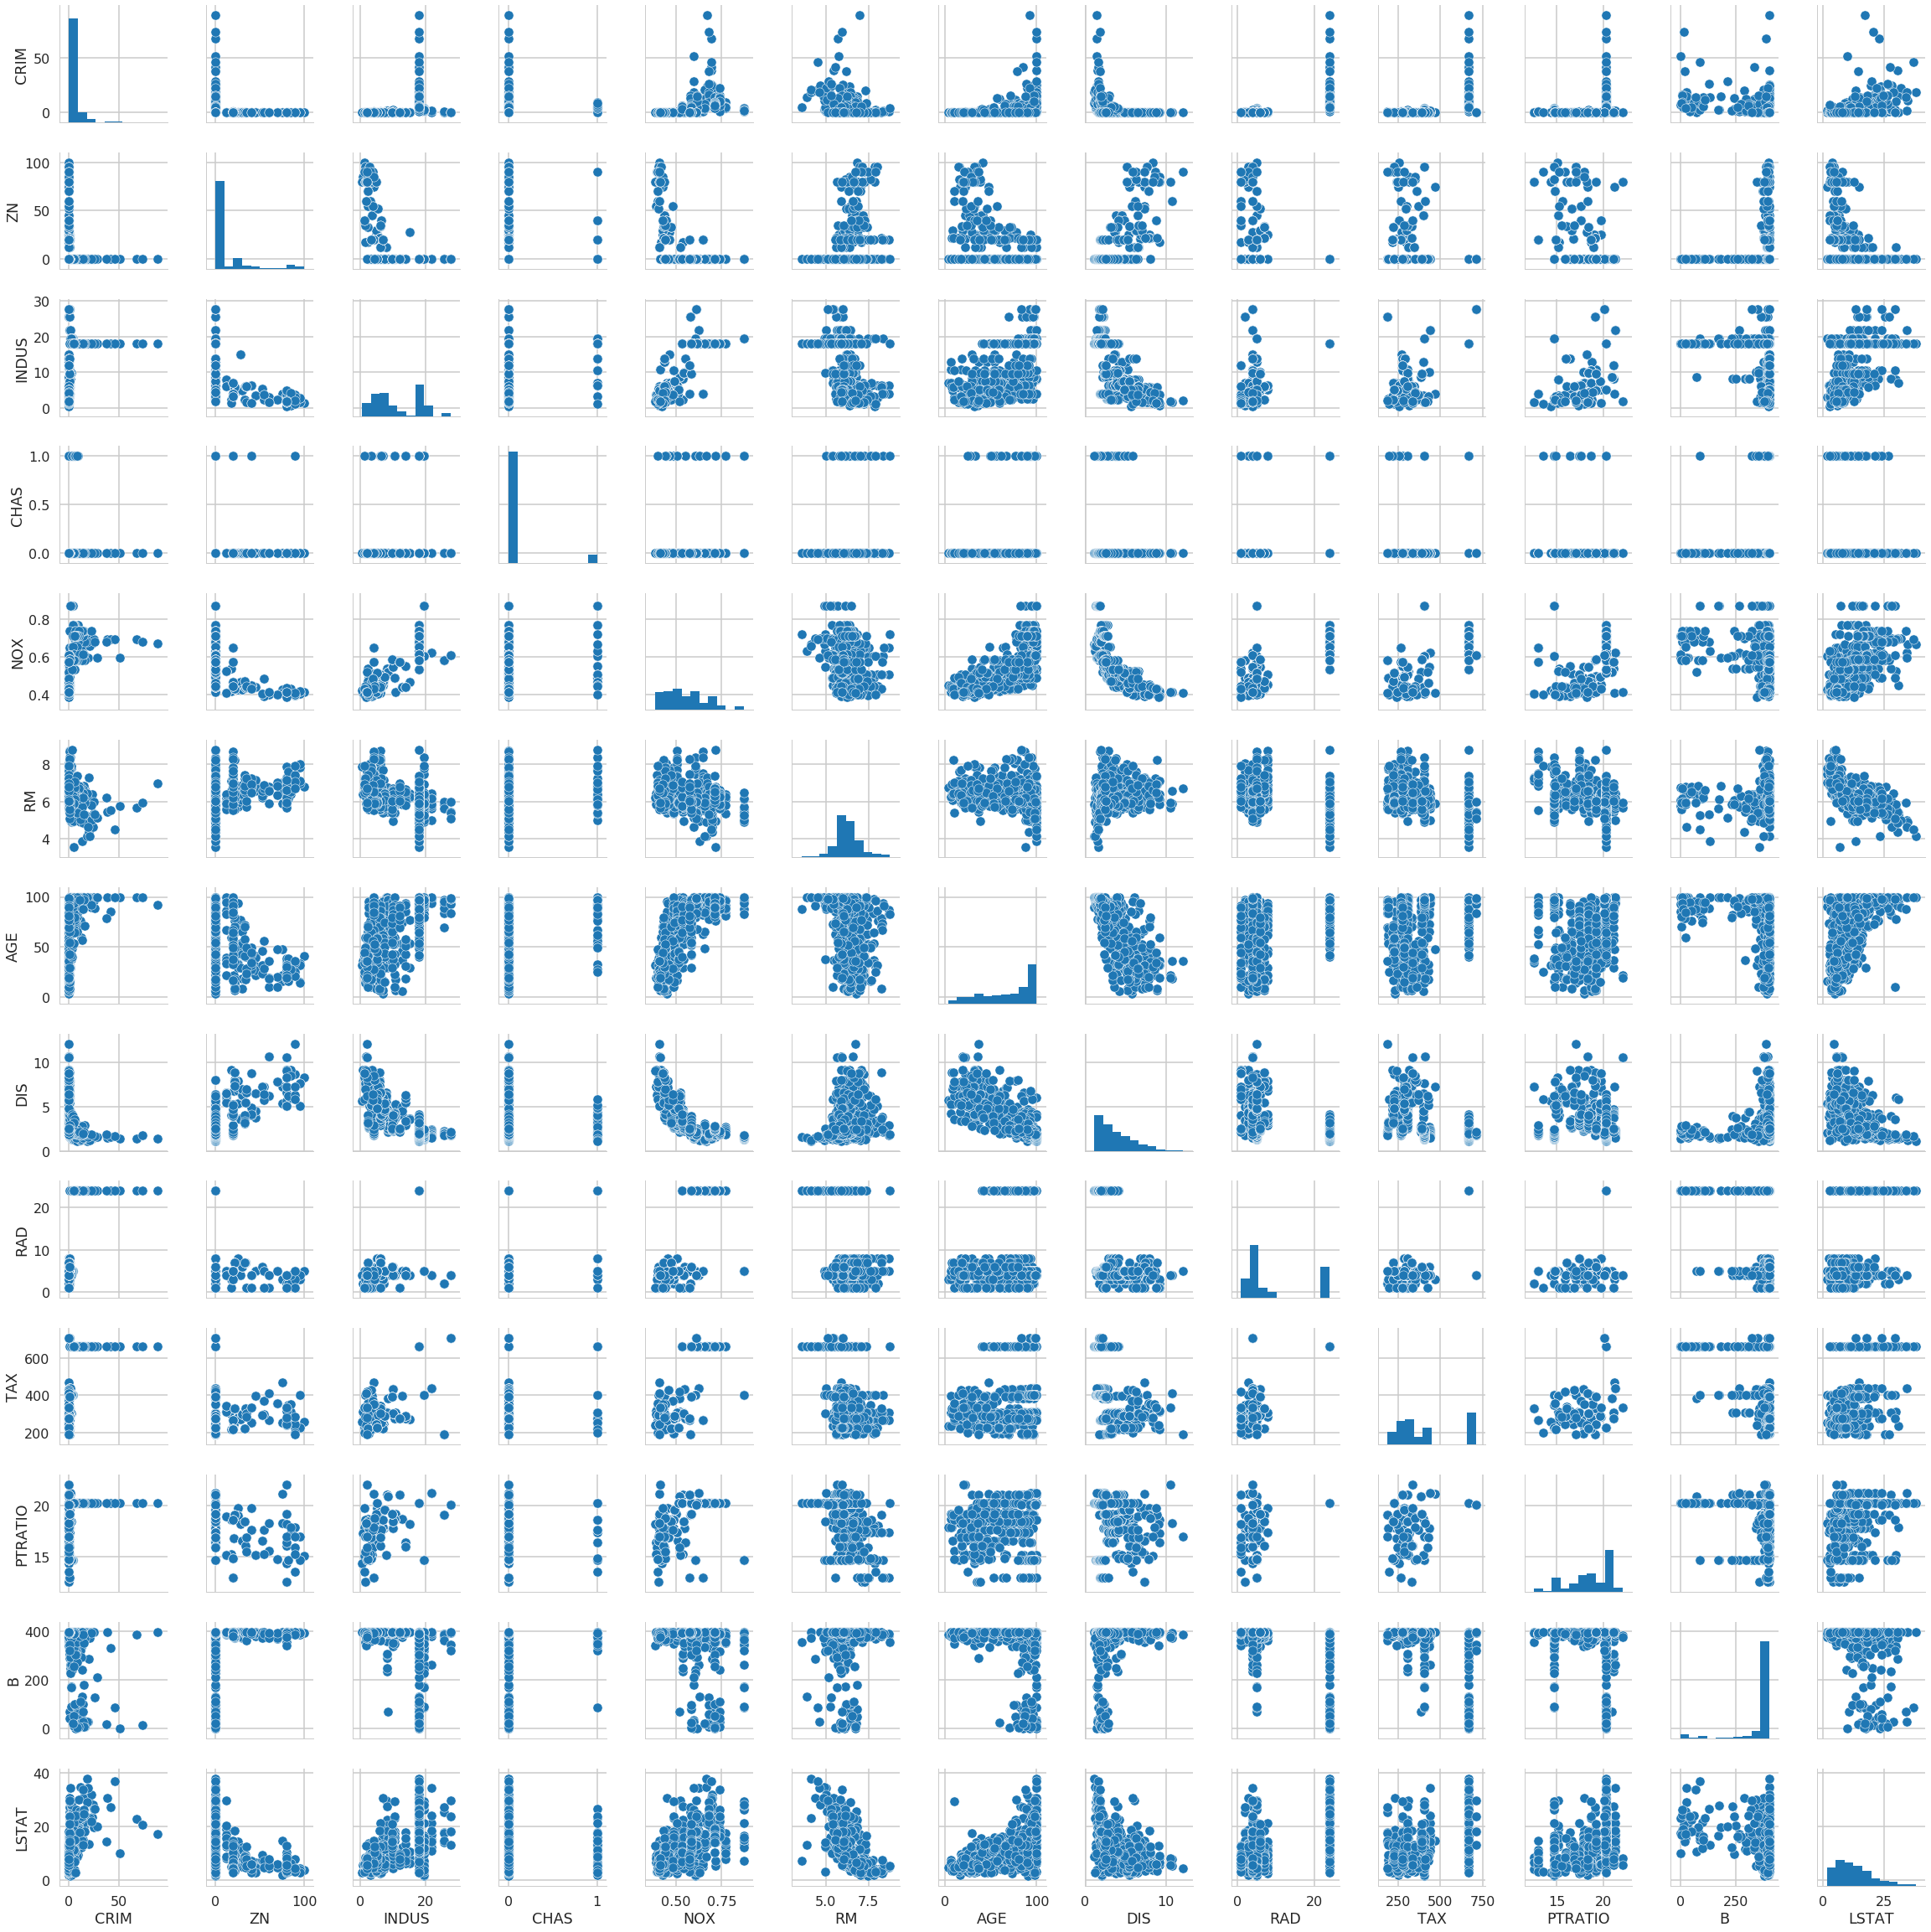

In [19]:

#Optional plotting
#Additional plot to visulaise the pairwise relationship in the data

#Plot pairwise relationships in a dataset
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import seaborn as sns 
sns.pairplot(bos)